In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
customer_data_df=pd.read_csv("customers_data.csv")

In [3]:
customer_data_df.head(5)

,debt_to_income_ratio,credit_score,Defaulted
0,7.520215,14.611884,0
1,15.129782,4.930069,1
2,8.880535,14.964281,0
3,7.594710,13.827473,0
4,6.332894,14.837548,0


In [4]:
customer_data_df['default'].unique()

KeyError: 'default'

The target is default and it has two values 0 and 1

In [ ]:
X1=customer_data_df['debt_to_income_ratio']
X2=customer_data_df['credit_score']
y=customer_data_df['default']


<p style="background-color:pink;"><b> a) Generate a scatter plot of the data in “customers_data.csv”. Color code the data points to
visualize the datapoints belonging to each class.</b> </p>

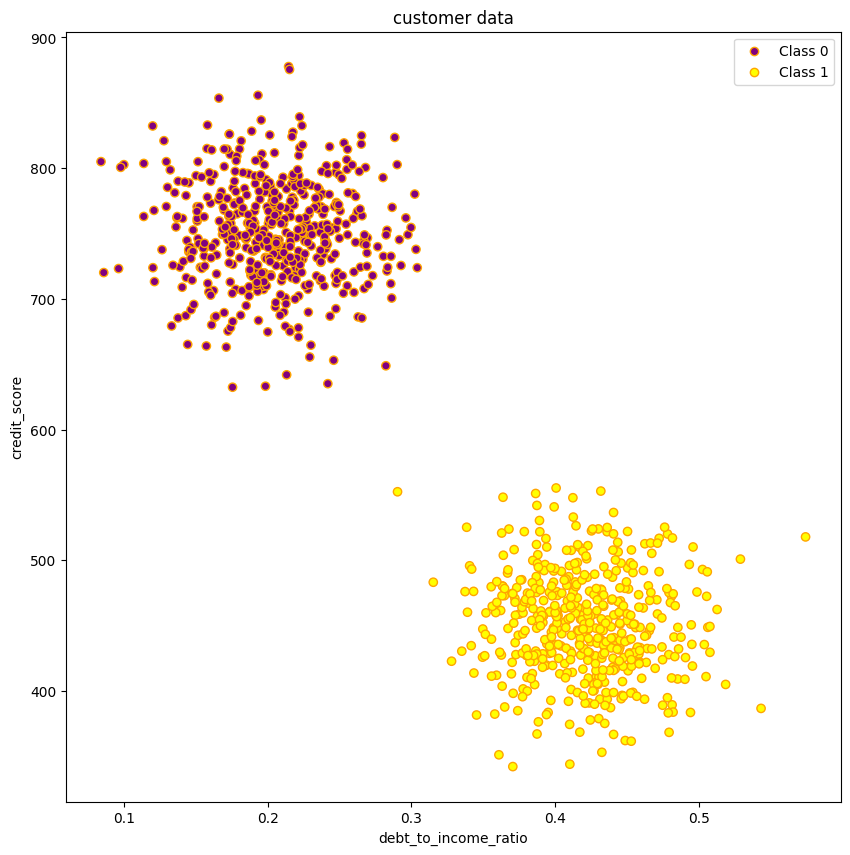

In [ ]:
plt.figure(figsize=(10,10))
colors=np.array(['purple','yellow'])
plt.scatter(X1,X2,c=colors[y],edgecolor="orange")
for label in np.unique(y):
    plt.scatter([],[],color=colors[label],edgecolor="orange",label=f'Class {label}')
plt.legend()
plt.title("customer data")
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score')
plt.show()


<p style="background-color:#90D5FF;"><i> The yellow points indicate label 1 and purple is label 0 </i>

<p style="background-color:pink;"><b> b) Preprocess the data and build an SVM classifier with very large C value. What type of margin
classifier is this? </b>



In [ ]:
def create_histplot(feature):
    print(f"{feature.name} mean is {np.mean(feature)} \n {feature.name} median is {np.median(feature)}")
    sns.histplot(feature,kde=True)
    plt.title(f"histogram of {feature.name}")
    plt.show()

debt_to_income_ratio mean is 0.3123064504885786 
 debt_to_income_ratio median is 0.30362784903669426


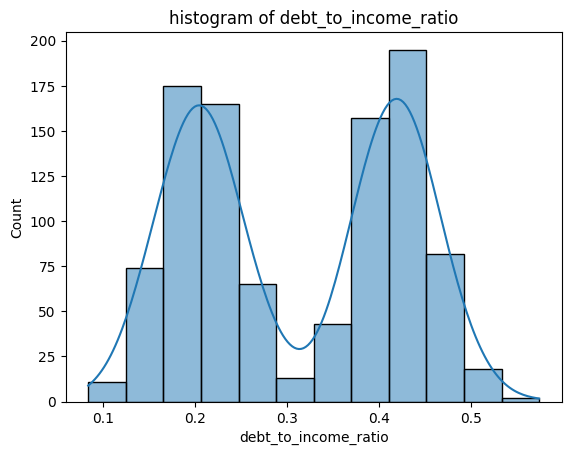

In [ ]:
create_histplot(X1)

credit_score mean is 601.3002812342805 
 credit_score median is 593.8398686034623


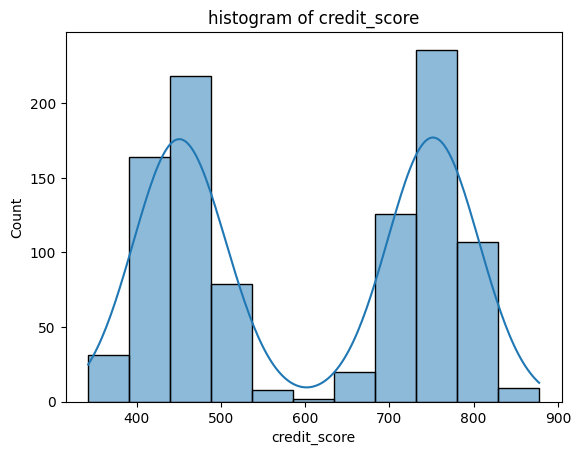

In [ ]:
create_histplot(X2)

<b> The scaler is only applied to credit score because debt to income ratio is in the expected range of (-3 to 3) </b>

In [ ]:
scaler=StandardScaler()



In [ ]:
X2_scaled=scaler.fit_transform(customer_data_df[['credit_score']])

In [ ]:
customer_data_df['credit_score_scaled']=X2_scaled

In [ ]:
customer_data_df.head()

,debt_to_income_ratio,credit_score,default,credit_score_scaled
0,0.177052,773.283908,0,1.109111
1,0.177856,707.287883,0,0.683507
2,0.184835,745.822031,0,0.932011
3,0.100024,802.684603,0,1.298714
4,0.375014,458.766013,1,-0.919194


credit_score_scaled mean is 5.364597654988756e-16 
 credit_score_scaled median is -0.048111689247878106


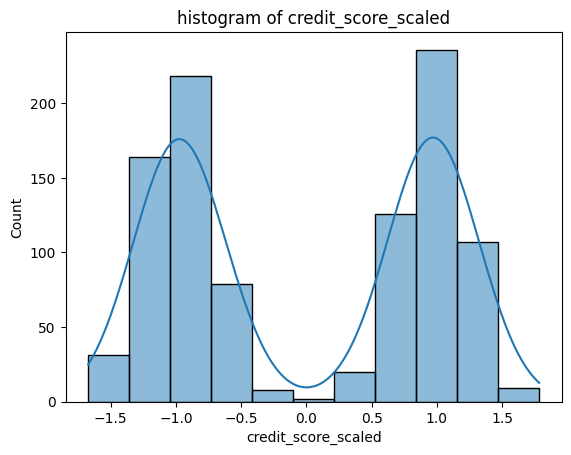

In [ ]:
create_histplot(customer_data_df['credit_score_scaled'])

In [ ]:
features=['debt_to_income_ratio','credit_score_scaled']
X=customer_data_df[features]

In [ ]:
model=SVC(kernel='linear',C=1e20)
model.fit(X,y)


SVC(C=1e+20, kernel='linear')

In [ ]:
w0=model.intercept_[0]
w=model.coef_[0]


In [ ]:
print(f'SVM coefficients: \n intercept:{w0}')
for idx,weights in enumerate(w):
    print(f"w{idx}: {weights}")

SVM coefficients: 
 intercept:-0.3879667954312607
w0: 0.7517273656240244
w1: -3.7083730105750106


<p style="background-color:#90D5FF;"><b>C is set to 1e20. It is a hard margin classifier. In this type the model tries to classify all points of the training set correctly as C is essentially a penality for wrong classification. </b>

<p style="background-color:pink;"><b>c) Plot the decision boundary of the resulting SVM model and show the margins and the
resulting support vectors. How many support vectors are there? </b>

In [ ]:
X1_min=X1.min()

X1_max=X1.max()
x_values=np.linspace(X1_min-1,X1_max+1,500)

<b> constructing decision boundary </b>

In [ ]:
hm_decision_boundary=-(w[0]/w[1])*x_values-w0/w[1]

<b> constructing margin </b>

In [ ]:
margin = 1 / np.sqrt(np.sum(w ** 2))
margin_line_up = hm_decision_boundary + margin
margin_line_down = hm_decision_boundary - margin

<b> get the support vectors </b>

In [ ]:
model.support_vectors_

array([[ 0.19851111,  0.20537073],
       [ 0.17560868,  0.2004597 ],
       [ 0.29034931, -0.31533275]])

In [ ]:
len(model.support_vectors_[:,0])

3

<b> Plotting the SVM </b>

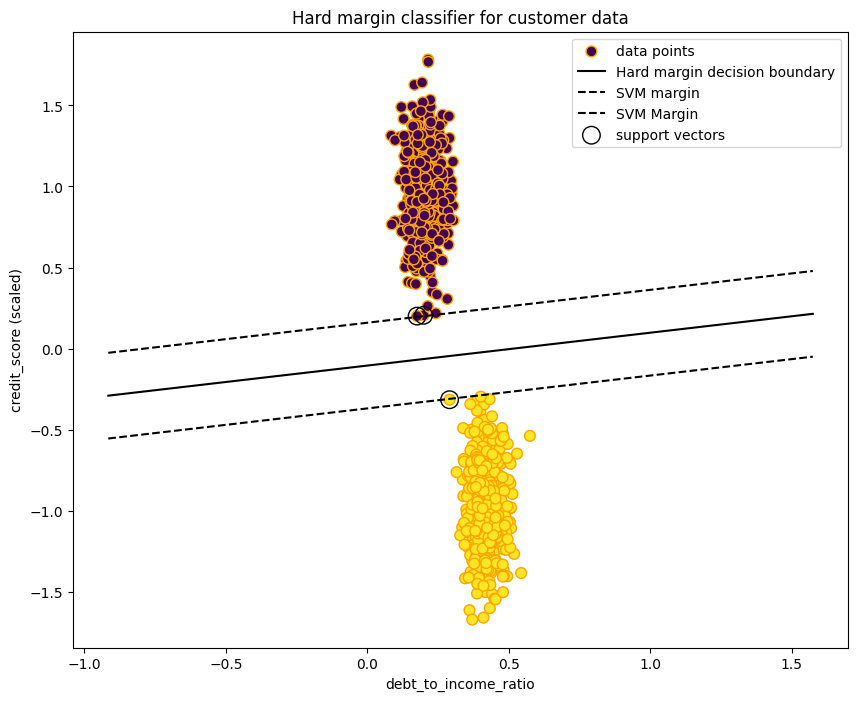

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=X['debt_to_income_ratio'],
    y=X['credit_score_scaled'],
    c=y,
    s=60,
    edgecolor="orange",
    label="data points"
)
plt.plot(
    x_values,
    hm_decision_boundary,
    "k-",
    label="Hard margin decision boundary"
)
plt.plot(
    x_values,
    margin_line_up,
    "k--",
    label="SVM margin"
)
plt.plot(
    x_values,
    margin_line_down,
    "k--",
    label="SVM Margin"
    
)
plt.scatter(
    model.support_vectors_[:,0],
    model.support_vectors_[:,1],
    s=160,
    facecolor='none',
    edgecolor='k',
    label="support vectors"
)

plt.title("Hard margin classifier for customer data")
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score (scaled)')
plt.legend()
plt.show()



<p style="background-color:#90D5FF;"><b> There are three support vectors </b>

<p style="background-color:pink;"><b> d) Evaluate the classifier on the “customers_data_test.csv”. Report the value(s) of the
appropriate evaluation metric(s). </b>

In [ ]:
test=pd.read_csv('customers_data_test.csv')

In [ ]:
test.head()

,debt_to_income_ratio,credit_score,default
0,0.302919,480.825390,1
1,0.375017,474.123787,1
2,0.371863,325.946926,1
3,0.226629,772.590299,0
4,0.157082,793.688387,0


In [ ]:
scaled_score=scaler.fit_transform(test[['credit_score']])

In [ ]:
test['credit_score_scaled']=scaled_score

In [ ]:
test.head()

,debt_to_income_ratio,credit_score,default,credit_score_scaled
0,0.302919,480.825390,1,-0.738049
1,0.375017,474.123787,1,-0.777999
2,0.371863,325.946926,1,-1.661330
3,0.226629,772.590299,0,1.001256
4,0.157082,793.688387,0,1.127029


In [ ]:
y_test=test['default']

In [ ]:
X_test=test.drop(['default','credit_score'],axis=1)

In [ ]:
X_test.head()

,debt_to_income_ratio,credit_score_scaled
0,0.302919,-0.738049
1,0.375017,-0.777999
2,0.371863,-1.661330
3,0.226629,1.001256
4,0.157082,1.127029


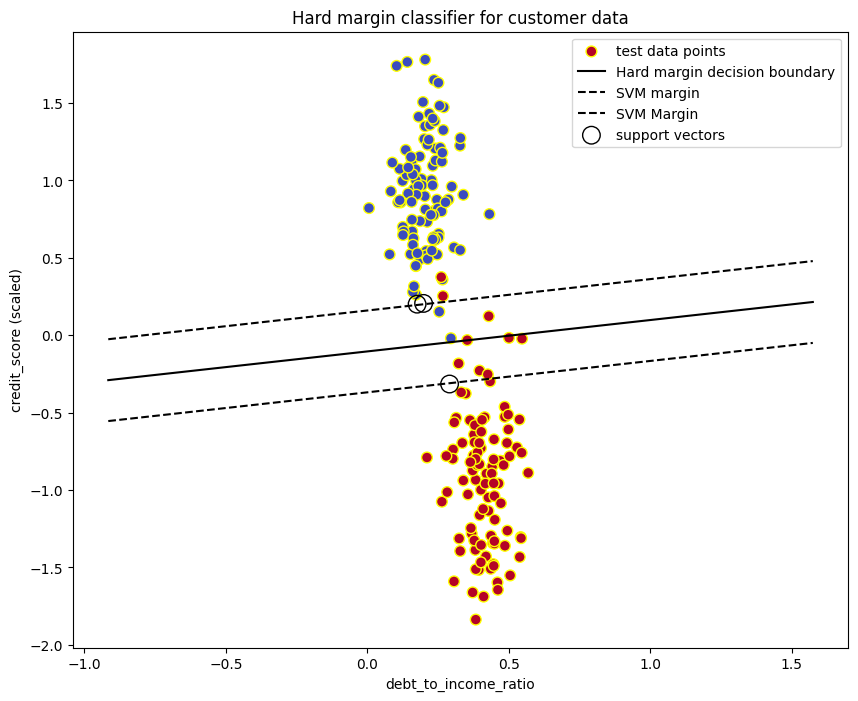

In [ ]:
plt.figure(figsize=(10,8))

plt.scatter(
    x=X_test['debt_to_income_ratio'],
    y=X_test['credit_score_scaled'],
    c=y_test,
    cmap='coolwarm',
    s=60,
    edgecolor="yellow",
    label="test data points"
)
plt.plot(
    x_values,
    hm_decision_boundary,
    "k-",
    label="Hard margin decision boundary"
)
plt.plot(
    x_values,
    margin_line_up,
    "k--",
    label="SVM margin"
)
plt.plot(
    x_values,
    margin_line_down,
    "k--",
    label="SVM Margin"
    
)
plt.scatter(
    model.support_vectors_[:,0],
    model.support_vectors_[:,1],
    s=160,
    facecolor='none',
    edgecolor='k',
    label="support vectors"
)

plt.title("Hard margin classifier for customer data")
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score (scaled)')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_test)

<b> Evaluation metrics : score (accuracy) </b>

In [ ]:
model.score(X_test,y_test)

0.98

<b> Evaluation metrics : accuracy ,precision , recall and F1 score </b>

In [ ]:
count=0
correct=0
TP=0
TN=0
FP=0
FN=0
for i in range(0,len(X_test)):
    count+=1
    if y_pred[i]==y_test[i]:
        correct+=1
    if y_test[i]==1:#positive 
        if y_pred[i]==0:
            FN+=1
        else:
            TP+=1
    else: #if negative
        if y_pred[i]==0:
            TN+=1
        else:
            FP+=1
        
    
accuracy=correct/count
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F1_score=(2*precision*recall)/(precision+recall)
print(
    f"Total: {count}  - correct predictions:{correct} - TP: {TP} -FP : {FP} - TN : {TN} -FN: {FN} \n accuracy:{accuracy} \n precision: {precision} \n recall:{recall} \n F1_score:{F1_score}")

Total: 200  - correct predictions:196 - TP: 96 -FP : 0 - TN : 100 -FN: 4 
 accuracy:0.98 
 precision: 1.0 
 recall:0.96 
 F1_score:0.9795918367346939


<p style="background-color:#90D5FF;"><b> Accuracy is : 98% , precision is 100% , recall is 96% and F1 score is 98%. This system is designed giving a higher priority that customers dont get falsely flagged as defaulted </b>

<p style="background-color:pink;"><b> e) Use the “customers_data_full.csv” dataset to build an SVM classifier. Set the value of C to be
a very large value.</b>

In [ ]:
customer_full_df=pd.read_csv("customers_data_full.csv")

In [ ]:
customer_full_df.head(5)

,debt_to_income_ratio,credit_score,default
0,0.168127,718.363544,0
1,0.410404,503.140861,1
2,0.178578,790.184985,0
3,0.422786,481.340185,1
4,0.285342,729.837279,0


In [ ]:
len(customer_full_df)

2000

In [ ]:
default=customer_full_df['default']

In [ ]:
customer_full_df['credit_score_scaled']=scaler.fit_transform(customer_full_df[['credit_score']])

In [ ]:
customer_full_df.head(5)

,debt_to_income_ratio,credit_score,default,credit_score_scaled
0,0.168127,718.363544,0,0.714727
1,0.410404,503.140861,1,-0.605216
2,0.178578,790.184985,0,1.155202
3,0.422786,481.340185,1,-0.738918
4,0.285342,729.837279,0,0.785095


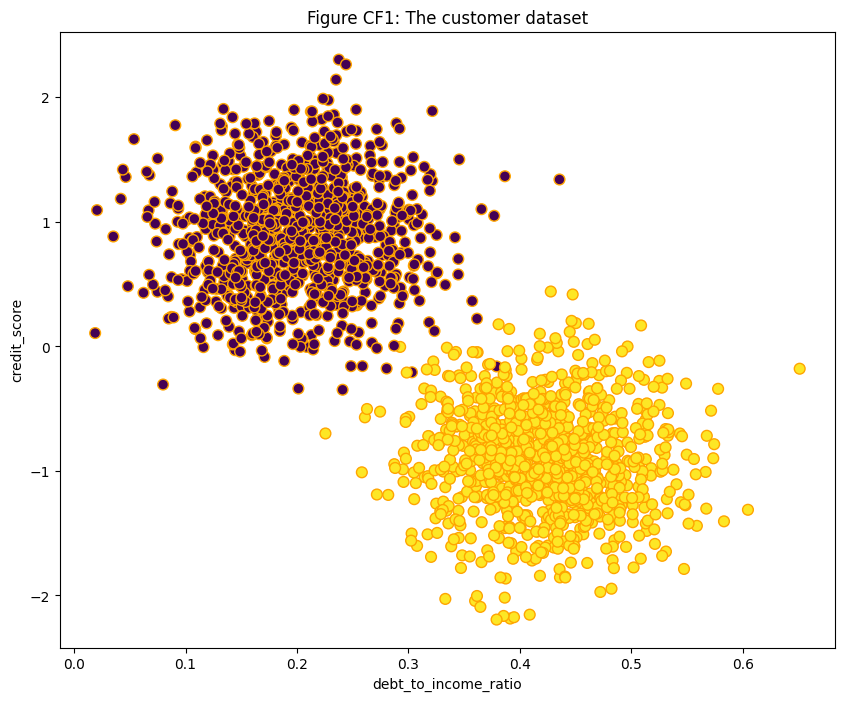

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=customer_full_df['debt_to_income_ratio'],
    y=customer_full_df['credit_score_scaled'],
    c=default,
    s=60,
    edgecolor="orange",
    label="data points"
)
plt.title("Figure CF1: The customer dataset")
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score')
plt.show()

In [ ]:
customer_full_df=customer_full_df.drop(['credit_score','default'],axis=1)

In [ ]:
customer_full_df.head(5)

,debt_to_income_ratio,credit_score_scaled
0,0.168127,0.714727
1,0.410404,-0.605216
2,0.178578,1.155202
3,0.422786,-0.738918
4,0.285342,0.785095


<b> I set the C value to be 1e05 because for 1e10 , the margins are not visible and the model doesnt give an output (for around 4 minutes i checked) for values greater than 1e15 </b>

In [ ]:
model_2=SVC(kernel='linear',C=1e05)

In [ ]:
model_2.fit(customer_full_df,default)

SVC(C=100000.0, kernel='linear')

In [ ]:
intercept_full=model_2.intercept_[0]
weights_full=model_2.coef_[0]

In [ ]:
weights_full

array([41.71459422, -7.39665593])

In [ ]:
print(f'SVM coefficients: \n intercept:{intercept_full}')
for idx,w in enumerate(weights_full):
    print(f"w{idx}: {w}")

SVM coefficients: 
 intercept:-13.58365990986801
w0: 41.714594223248945
w1: -7.396655931592169


In [ ]:
X1_min=customer_full_df['debt_to_income_ratio'].min()
X1_max=customer_full_df['debt_to_income_ratio'].max()
x_values=np.linspace(X1_min-1,X1_max+1,500)

In [ ]:
hm_decision_boundary_full=-(weights_full[0]/weights_full[1])*x_values-intercept_full/weights_full[1]

In [ ]:
margin = 1 / np.sqrt(np.sum(weights_full ** 2))
margin_line_up = hm_decision_boundary_full + margin
margin_line_down = hm_decision_boundary_full - margin

In [ ]:
model_2.support_vectors_

array([[ 0.24092312, -0.3488742 ],
       [ 0.30316267, -0.20878721],
       [ 0.28042766, -0.1783534 ],
       [ 0.36158202,  0.22174751],
       [ 0.37911554, -0.16162115],
       [ 0.32339261,  0.1224017 ],
       [ 0.29256626, -0.00498312],
       [ 0.38090398,  0.17635552],
       [ 0.32234745, -0.12206382],
       [ 0.33451511, -0.01143894],
       [ 0.29849144, -0.21088067],
       [ 0.22552396, -0.69983463],
       [ 0.31650493, -0.18586811]])

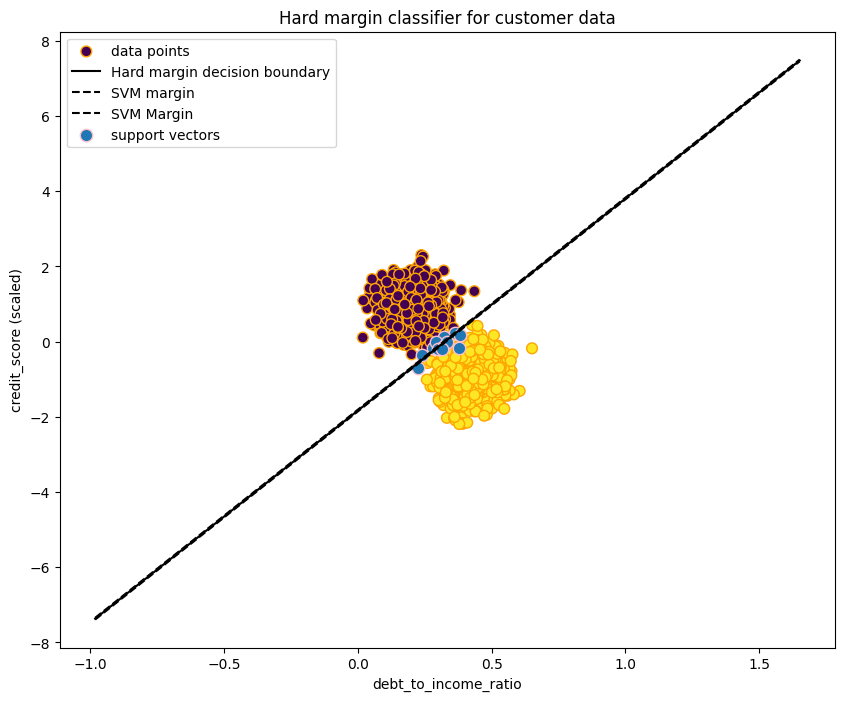

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=customer_full_df['debt_to_income_ratio'],
    y=customer_full_df['credit_score_scaled'],
    c=default,
    s=60,
    edgecolor="orange",
    label="data points"
)
plt.plot(
    x_values,
    hm_decision_boundary_full,
    "k-",
    label="Hard margin decision boundary"
)
plt.plot(
    x_values,
    margin_line_up,
    "k--",
    label="SVM margin"
)
plt.plot(
    x_values,
    margin_line_down,
    "k--",
    label="SVM Margin"
    
)
plt.scatter(
    model_2.support_vectors_[:,0],
    model_2.support_vectors_[:,1],
    s=80,
    #facecolor='none',
    edgecolor='pink',
    label="support vectors"
)

plt.title("Hard margin classifier for customer data")
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score (scaled)')
plt.legend()
plt.show()


<p style="background-color:pink;"><b> f) Discuss any issues you run into when building an SVM classifier using
“customers_data_full.csv” and a large value for C. Explain what could be causing those
issues</b>

<p style="background-color:#90D5FF;"><b> As we can see in figure CF1 , the data is not fully perfectly linearly seperable since there are some points that gets in to clusters they dont belong . So the task of finding a hard margin classifier (with very large C) is not easy. The model doesnt seem to be able to come up with a solution for C>1e12 (for the time I ran it which is around 4 minutes). Even for C=1e12 , the margins are not visible indicating the decision boundary and margins may even be overlapping. This defeats the purpose of an SVM because our aim with this method is to ensure we find the maximum margin .  </b>

<p style="background-color:pink;"><b> g) Build an SVM classifier that is suitable for the data in “customers_data_full.csv”. What type
of margin classifier is this?</b>

<b> We will use softmargin classifier </b>

In [ ]:
model_3=SVC(kernel="linear", C=1)

In [ ]:
model_3.fit(customer_full_df,default)

SVC(C=1, kernel='linear')

In [ ]:
intercept_full_3=model_3.intercept_[0]
weights_full_3=model_3.coef_[0]

In [ ]:
print(f'SVM coefficients: \n intercept:{intercept_full_3}')
for idx,w in enumerate(weights_full_3):
    print(f"w{idx}: {w}")

SVM coefficients: 
 intercept:-1.929762041378881
w0: 6.399178149224218
w1: -2.4784438887092395


In [ ]:
decision_boundary_full_3=-(weights_full_3[0]/weights_full_3[1])*x_values-intercept_full_3/weights_full_3[1]

In [ ]:
margin = 1 / np.sqrt(np.sum(weights_full_3 ** 2))
margin_line_up = decision_boundary_full_3 + margin
margin_line_down = decision_boundary_full_3 - margin

In [ ]:
model_3.support_vectors_

array([[ 0.17088165, -0.08557977],
       [ 0.21292379,  0.08963724],
       [ 0.31858644,  0.19241394],
       [ 0.29098364,  0.18357723],
       [ 0.30995342,  0.36589619],
       [ 0.14447452, -0.03139205],
       [ 0.24037167,  0.16553861],
       [ 0.20860331, -0.00512395],
       [ 0.2050296 ,  0.05949016],
       [ 0.24092312, -0.3488742 ],
       [ 0.30316267, -0.20878721],
       [ 0.24743754,  0.03906273],
       [ 0.18856981, -0.1174172 ],
       [ 0.20432221,  0.06066537],
       [ 0.25529901,  0.11114569],
       [ 0.28042766, -0.1783534 ],
       [ 0.17290043,  0.06348359],
       [ 0.35724759,  0.36350811],
       [ 0.24884911,  0.13896246],
       [ 0.21960469,  0.12828447],
       [ 0.28719564,  0.00478747],
       [ 0.36158202,  0.22174751],
       [ 0.23377285,  0.04220524],
       [ 0.26704393,  0.18637816],
       [ 0.24842736, -0.1594989 ],
       [ 0.37911554, -0.16162115],
       [ 0.29194206,  0.34386541],
       [ 0.1728051 ,  0.07113434],
       [ 0.20114887,

In [ ]:
print(f"number of support vectors {len(model_3.support_vectors_[:,0])}")

number of support vectors 89


In [ ]:
model_3.n_support_

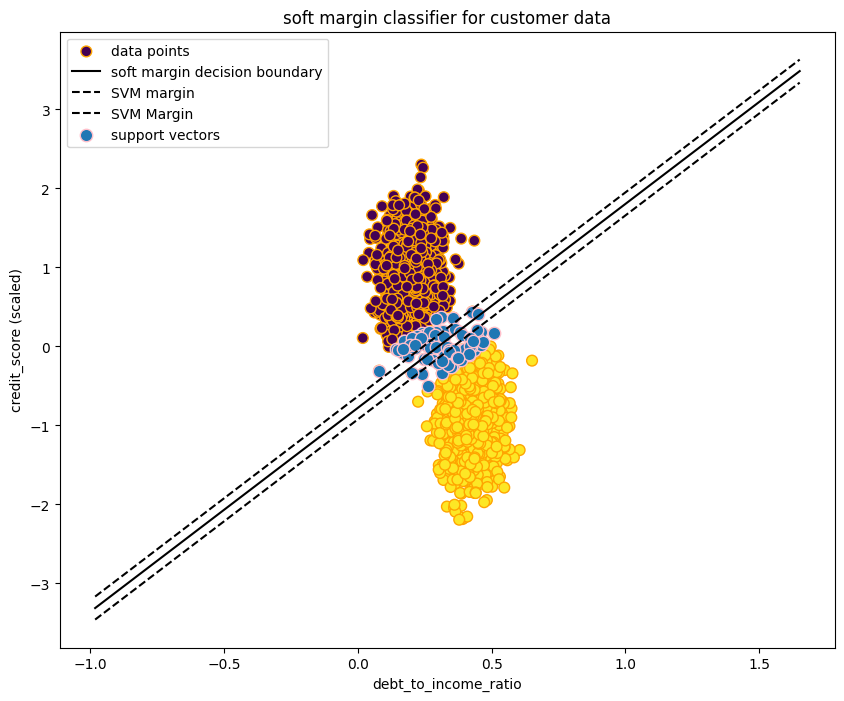

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=customer_full_df['debt_to_income_ratio'],
    y=customer_full_df['credit_score_scaled'],
    c=default,
    s=60,
    edgecolor="orange",
    label="data points"
)
plt.plot(
    x_values,
    decision_boundary_full_3,
    "k-",
    label="soft margin decision boundary"
)
plt.plot(
    x_values,
    margin_line_up,
    "k--",
    label="SVM margin"
)
plt.plot(
    x_values,
    margin_line_down,
    "k--",
    label="SVM Margin"
    
)
plt.scatter(
    model_3.support_vectors_[:,0],
    model_3.support_vectors_[:,1],
    s=80,
    #facecolor='none',
    edgecolor='pink',
    label="support vectors"
)

plt.title("soft margin classifier for customer data")
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score (scaled)')
plt.legend()
plt.show()

<p style="background-color:#90D5FF;"><b> This a soft margin classifier . This allows us to remove that restriction that every sample in training set should be classified correctly and allows for misclassification which can prevent overfitting and lead to better results during the testing phase.   </b>

<p style="background-color:pink;"><b> h) Choose the value of C that results in the best performance.</b>

In [ ]:
#C_list=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
C_list=[]
c=0
while c<2000:
    c=c+0.5
    C_list.append(c)
#print(C_list)

In [ ]:
accuracy_list=[]
optimal_c=[]
sv_list=[]
optimal_c_sv=[]
margin_list=[]
max_margin_acc=[]


for c in C_list:
    model_x=SVC(kernel="linear", C=c)
    model_x.fit(customer_full_df,default)
    w=model_x.coef_[0]
    margin = 1 / np.sqrt(np.sum(w ** 2))
    margin_list.append(margin)
    accuracy_list.append(model_x.score(customer_full_df,default))
    sv_list.append(len(model_x.support_vectors_[:,0]))



max_margin=np.max(margin_list)

    

for idx,marg in enumerate(margin_list):
    if marg==max_margin:
        optimal_c.append(C_list[idx])
        optimal_c_sv.append(sv_list[idx])
        max_margin_acc.append(accuracy_list[idx])
        
#print(optimal_c)
#print(max_margin_acc)

print(f"The maximum margin is {max_margin}, ie , the distance between the margins is {2*max_margin}\n the C corresponding to this value is {optimal_c} and \n the resulting accuracy is {max_margin_acc}")
        
    
    

The maximum margin is 0.19336014202222446, ie , the distance between the margins is 0.3867202840444489
 the C corresponding to this value is [0.5] and 
 the resulting accuracy is [0.994]


<p style="background-color:#90D5FF;"><b> I prioritised the maximum margin. With that as a constraint , the C value is 0.5 and the resulting accuracy is 0.994 which is not bad considering the maximum accuracy irrespective of margin is 0.9985 . So here I am ensuring maximum margin possible and a high accuracy</b>

<p style="background-color:pink;"><b> i) Plot the decision boundary of the resulting SVM model and show the margins and the
resulting support vectors. How many support vectors are there?</b>

In [ ]:
model_opt=SVC(kernel="linear", C=0.5)
model_opt.fit(customer_full_df,default)
intercept_opt=model_opt.intercept_[0]
weights_opt=model_opt.coef_[0]
print(f'SVM coefficients: \n intercept:{intercept_opt}')
for idx,w in enumerate(weights_opt):
    print(f"w{idx}: {w}")
decision_boundary_opt=-(weights_opt[0]/weights_opt[1])*x_values-intercept_opt/weights_opt[1]
margin = 1 / np.sqrt(np.sum(weights_opt ** 2))
margin_line_up = decision_boundary_opt + margin
margin_line_down = decision_boundary_opt - margin




SVM coefficients: 
 intercept:-1.4198027985460473
w0: 4.515019905596336
w1: -2.5221105366534746


In [ ]:
model_opt.support_vectors_

array([[ 0.17088165, -0.08557977],
       [ 0.21292379,  0.08963724],
       [ 0.31858644,  0.19241394],
       [ 0.29098364,  0.18357723],
       [ 0.30995342,  0.36589619],
       [ 0.14447452, -0.03139205],
       [ 0.11604163, -0.00678172],
       [ 0.24037167,  0.16553861],
       [ 0.20860331, -0.00512395],
       [ 0.2050296 ,  0.05949016],
       [ 0.24092312, -0.3488742 ],
       [ 0.30316267, -0.20878721],
       [ 0.24743754,  0.03906273],
       [ 0.18856981, -0.1174172 ],
       [ 0.20432221,  0.06066537],
       [ 0.25529901,  0.11114569],
       [ 0.14239722,  0.01489683],
       [ 0.28042766, -0.1783534 ],
       [ 0.17290043,  0.06348359],
       [ 0.35724759,  0.36350811],
       [ 0.24884911,  0.13896246],
       [ 0.21960469,  0.12828447],
       [ 0.1594893 ,  0.08972078],
       [ 0.28719564,  0.00478747],
       [ 0.36158202,  0.22174751],
       [ 0.23377285,  0.04220524],
       [ 0.26704393,  0.18637816],
       [ 0.24842736, -0.1594989 ],
       [ 0.37911554,

In [ ]:
print(f"number of support vectors : {len(model_opt.support_vectors_[:,0])}")

number of support vectors : 110


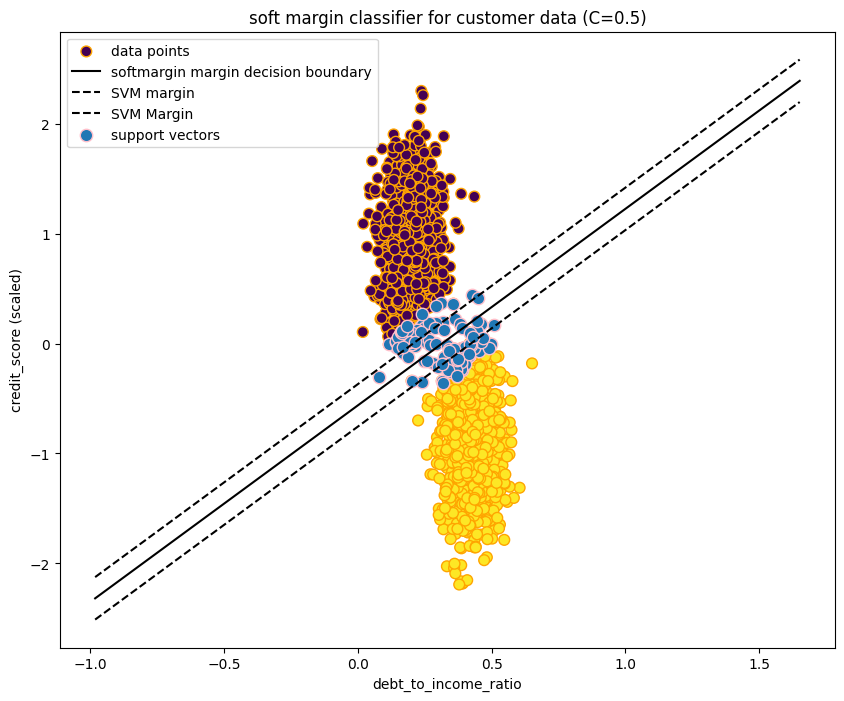

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(
    x=customer_full_df['debt_to_income_ratio'],
    y=customer_full_df['credit_score_scaled'],
    c=default,
    s=60,
    edgecolor="orange",
    label="data points"
)
plt.plot(
    x_values,
    decision_boundary_opt,
    "k-",
    label="softmargin margin decision boundary"
)
plt.plot(
    x_values,
    margin_line_up,
    "k--",
    label="SVM margin"
)
plt.plot(
    x_values,
    margin_line_down,
    "k--",
    label="SVM Margin"
    
)
plt.scatter(
    model_opt.support_vectors_[:,0],
    model_opt.support_vectors_[:,1],
    s=80,
    #facecolor='none',
    edgecolor='pink',
    label="support vectors"
)

plt.title("soft margin classifier for customer data (C=0.5)")
plt.xlabel('debt_to_income_ratio')
plt.ylabel('credit_score (scaled)')
plt.legend()
plt.show()

<p style="background-color:#90D5FF;"><b> There are 110 support vectors </b>